In [1]:
import pandas as pd
import random
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
def euclidean_distance(p, q):
    return np.sqrt(np.sum((np.array(p) - np.array(q)) ** 2))

def manhattan_distance(p, q):
    return np.sum(np.absolute(np.array(p) - np.array(q)))

def calulate_median(lst):
    sorted_lst = sorted(lst)
    n = len(sorted_lst)
    midpoint = n // 2

    if n % 2 == 0:
        return (sorted_lst[midpoint - 1] + sorted_lst[midpoint]) / 2
    else:
        return sorted_lst[midpoint]

In [3]:
class kMeans(object):
    def __init__(self):
        pass
        
    def __calculate_centroid_mean(self, centroid_index):
        return [sum(x)/len(x) for x in zip(*self.clusters[centroid_index])]

    def __calculate_centroid_median(self, centroid_index):
        median = []
        for i in range(len(self.clusters[centroid_index][0])):
            current_component = [point[i] for point in self.clusters[centroid_index]]
            median.append(calulate_median(current_component))

        return median

    def __execute_algorithm(self):
        while True:
            copy_centroids = self.centroids.copy()
            
            for idx, centroid in enumerate(self.centroids):
                self.clusters[idx] = []
    
            for point in self.points:
                centorid_distances = []
                for centroid in self.centroids:
                    if self.metric == 'mean':
                        centorid_distances.append(euclidean_distance(point, centroid))
                    else:
                        centorid_distances.append(manhattan_distance(point, centroid))
    
                min_index = centorid_distances.index(min(centorid_distances))
                self.clusters[min_index].append(point)
    
            for i in range(len(self.centroids)):
                if self.metric == 'mean':
                    self.centroids[i] = self.__calculate_centroid_mean(i)
                else:
                    self.centroids[i] = self.__calculate_centroid_median(i)
            
            # break if centroids not changed
            if np.array_equal(copy_centroids,self.centroids):
                break
        
    
    def fit(self, data, k, metric = 'mean'):
        self.k = k
        self.points = data.to_numpy()
        self.centroids = random.choices(self.points, k=k)
        self.clusters = {}
        self.metric = metric

        # plot
        plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])

        for centroid in self.centroids:
            plt.scatter(centroid[1], centroid[2],c='black')
        plt.xlabel('Annual Income (k$)')
        plt.ylabel('Spending Score')
        plt.show()
        # plot

        # execute means algorithm
        copy_centroid = self.centroids.copy()
        self.__execute_algorithm()
        self.plot()
        
        self.centroids = copy_centroid
        self.metric = 'median'

        # execute medians algorithm
        self.__execute_algorithm()
        self.plot()
        

    def plot(self):
        color=['grey','blue','orange', 'yellow', 'pink', 'red']
        
        for i, centroid in enumerate(self.centroids):
            for point in self.clusters[i]:
                plt.scatter(point[1], point[2],c=color[i])

            plt.scatter(centroid[1], centroid[2],c='black')
                
        plt.xlabel('Annual Income (k$)')
        plt.ylabel('Spending Score')
        plt.show()
        

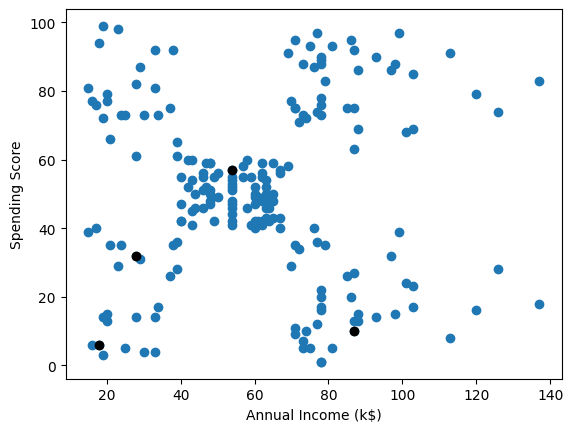

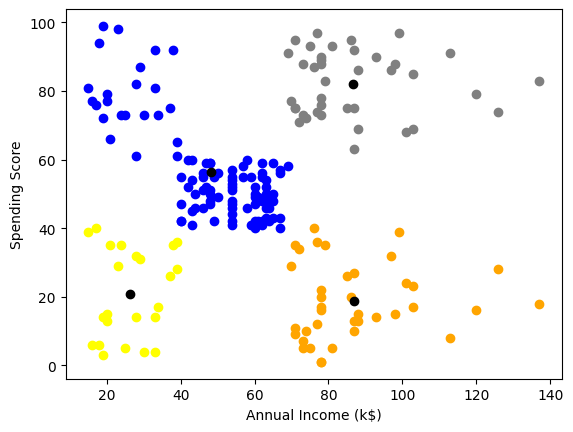

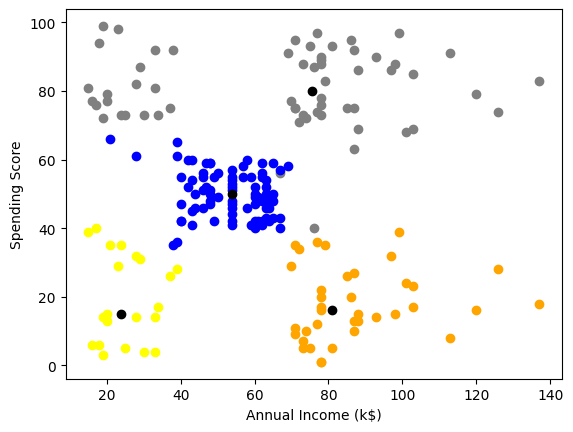

In [4]:
data = pd.read_csv('data/Mall_Customers.csv')
data = data.drop("CustomerID", axis=1)

data = pd.get_dummies(data, columns = ['Gender'])

kMeansCluster = kMeans()
kMeansCluster.fit(data, k = 4, metric = 'mean')